# Medidas de Similaridade

* X1. Formato (esférico/oval)? 
* X2. Fruta cítrica?
* X3. Cor?
* X4. Casca lisa ou rugosa?
* X5. Cheiro ativo?


In [5]:
from scipy.spatial import distance

laranja     = [0, 1, 2, 1, 0]
maca        = [0, 0, 1, 0, 0]

tangerina   = [0, 1, 2, 1, 1]

print("Euclidean (laranja, tangerina): {}".format(distance.euclidean(laranja, tangerina)))
print("Euclidean (maca, tangerina): {}\n".format(distance.euclidean(maca, tangerina)))

print("Cityblock (laranja, tangerina): {}".format(distance.cityblock(laranja, tangerina)))
print("Cityblock (maca, tangerina): {}".format(distance.cityblock(maca, tangerina)))

Euclidean (laranja, tangerina): 1.0
Euclidean (maca, tangerina): 2.0

Cityblock (laranja, tangerina): 1
Cityblock (maca, tangerina): 4


# K-Nearest Neighbor

In [6]:
from sklearn.neighbors import KNeighborsClassifier

X = [[0], [1], [2], [3]] # (4 amostras) 1 feature-1D
y = [0, 0, 1, 1] # classes

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) # treinamento

# teste
print(neigh.predict([[0.3]])) 
print(neigh.predict([[2.1]]))

[0]
[1]


# Base de Dados Iris

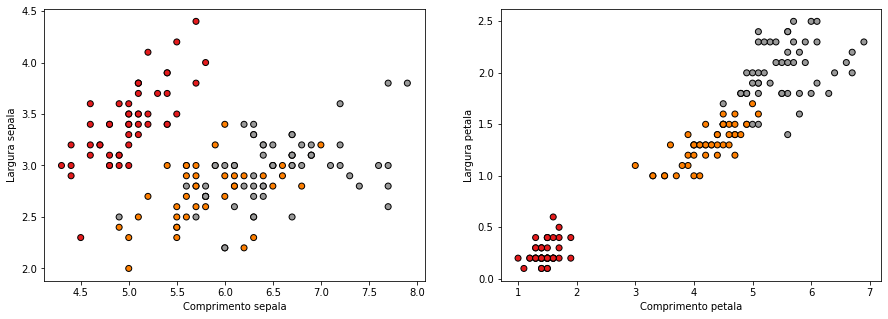

In [8]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]


iris = load_iris()
X = iris.data
y = iris.target

# Plota os dados
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Comprimento sepala')
plt.ylabel('Largura sepala')


plt.subplot(1, 2, 2)
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Comprimento petala')
plt.ylabel('Largura petala')

plt.show()

# Exercício Iris

In [9]:
from scipy.spatial import distance

setosa      = [5.1, 3.5, 1.4, 0.2]
versicolor  = [6.5, 2.8, 4.6, 1.5]
virginica   = [7.1, 3.0, 5.9, 2.1]

print("Distância Cityblock")
print(distance.cityblock(setosa, versicolor))
print(distance.cityblock(setosa, virginica))
print(distance.cityblock(versicolor, virginica))

print("\nDistância Euclidiana")
print(distance.euclidean(setosa, versicolor))
print(distance.euclidean(setosa, virginica))
print(distance.euclidean(versicolor, virginica))

Distância Cityblock
6.6000000000000005
8.9
2.7000000000000006

Distância Euclidiana
3.792097045171708
5.301886456724625
1.5652475842498532


![iris](img/iris.png)

# Taxa de acerto do kNN com base Iris

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

# Hold-out with balanced division
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25)


for train_index, test_index in sss.split(X, y):
    print("Índices TRAIN:", train_index, "\nÍndices TEST:", test_index) # índices escolhidos para treino e teste
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    indexs, c = np.unique(y_test, return_counts=True)
    print('Quantidade de amostras por classe: {} {}'.format(c, np.sum(c)))


    # kNN train
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)

    # kNN test
    y_predicted = neigh.predict(X_test)

    print('Real:\n{}\nPredito\n{}'.format(y_test, y_predicted))
    
    # Acurácia
    acc = np.sum(y_test == y_predicted)/len(y_test)
    print(acc)

Índices TRAIN: [132  48   5 114  72  15 128  74  61  84  63 149   9  38 101  25 125 146
 135  33  42 140 117 126 113 107  73  81  21 115  36  24   4 137 102  96
  39  28  90 119  18  14 142  57   8 133 109 103  22 143  52 139  43 136
  65 134  35  70 122  59  89  83  86 127  55  19  94  47  56  27  66  37
  71  82  34  78 129  93  20  92 121  99  44  53  11   2  51  60  23 138
   6 116  40  62 111 130  16  91 108 141  26  54  68  41 131  75  79  17
 144  80   3  85] 
Índices TEST: [ 77  97  64 110  46  32   7  69  31 118  12 106  29 120  87  88  95  10
   1 105  67 148  30  49  50  98   0  58 124  45 147 145 123 112  13 100
  76 104]
Quantidade de amostras por classe: [13 12 13] 38
Real:
[1 1 1 2 0 0 0 1 0 2 0 2 0 2 1 1 1 0 0 2 1 2 0 0 1 1 0 1 2 0 2 2 2 2 0 2 1
 2]
Predito
[1 1 1 2 0 0 0 1 0 2 0 1 0 2 1 1 1 0 0 2 1 2 0 0 1 1 0 1 2 0 2 2 2 2 0 2 1
 2]
0.9736842105263158


# K Means

Predict [0] [1]
Labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


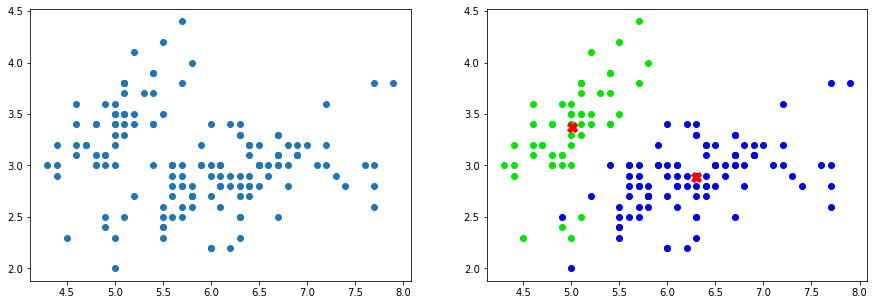

In [18]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


def plot_dados(X, kmeans):
    colors = [[0, .9, 0], [0, 0, .9]]

    # kmeans.labels_
    # kmeans.predict([[0, 0], [12, 3]])
    clusters = kmeans.cluster_centers_

    # Plota os dados
    plt.subplot(1, 2, 1)
    plt.plot(X[:, 0], X[:, 1], 'o')

    plt.subplot(1, 2, 2)
    for k in range(0, 2):
        plt.plot(X[kmeans.labels_ == k, 0], X[kmeans.labels_ == k, 1], 'o', color=colors[k])
        plt.plot(clusters[k, 0], clusters[k, 1], 'rX', markersize=10)

    plt.show()



# load dataset
iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=2).fit(X)


print('Predict {} {}'.format(kmeans.predict([X[0,:]]), kmeans.predict([X[140,:]])))
print('Labels {}'.format(kmeans.labels_))

plot_dados(X, kmeans)

# Perceptron

weights: [[-2.2 -4.4  6.9  3.5]]
bias: [-1.]


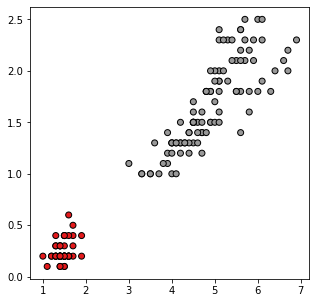

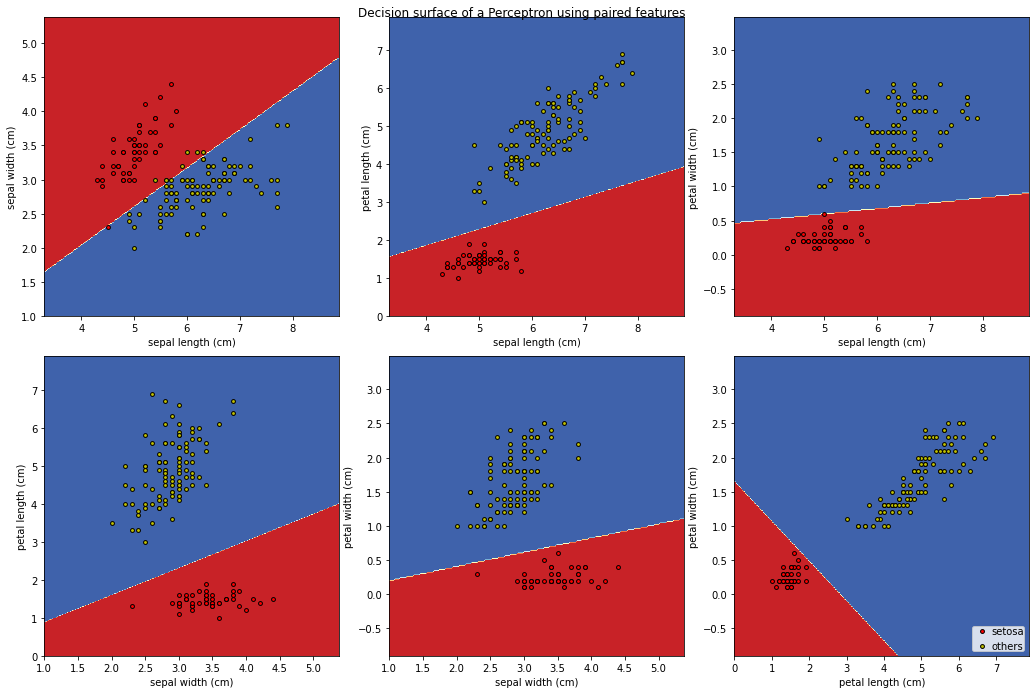

In [19]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np

def load_iris_3classes():
    data = load_iris()
    return data.data,data.target

def load_iris_binary():
    data = load_iris()
    X = data.data
    y = data.target
    y[y == 2] = 1

    return X,y

def decision_surface_percetron(n_classes):
    plot_colors = "ryb"
    plot_step = 0.02

    # Load data
    iris = load_iris()

    target_names = iris.target_names
    if n_classes == 2:
        target_names = ['setosa', 'others']
        
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target
        if n_classes == 2:
            y[y == 2] = 1

        # Train
        clf = Perceptron(tol=1e-3).fit(X, y)

        # Plot the decision boundary
        plt.figure(1, figsize=(15,10))
        plt.subplot(2, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle("Decision surface of a Perceptron using paired features")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()



if __name__ == '__main__':
    X, y = load_iris_binary()
    # X, y = load_iris_3classes()

    clf = Perceptron(tol=1e-3)
    clf.fit(X, y) # treinamento

    print("weights: {}".format(clf.coef_)) # the weights
    print("bias: {}".format(clf.intercept_)) # the bias
#     print(clf.predict(X))

    plt.figure(1, figsize=(5,5))
    plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1, edgecolor='k')
    plt.show()



    # Plot the decision surface on Iris dataset
    decision_surface_percetron(2)

# Multilayer Perceptron

[0 0 1 1]


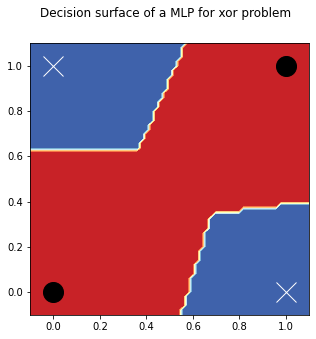

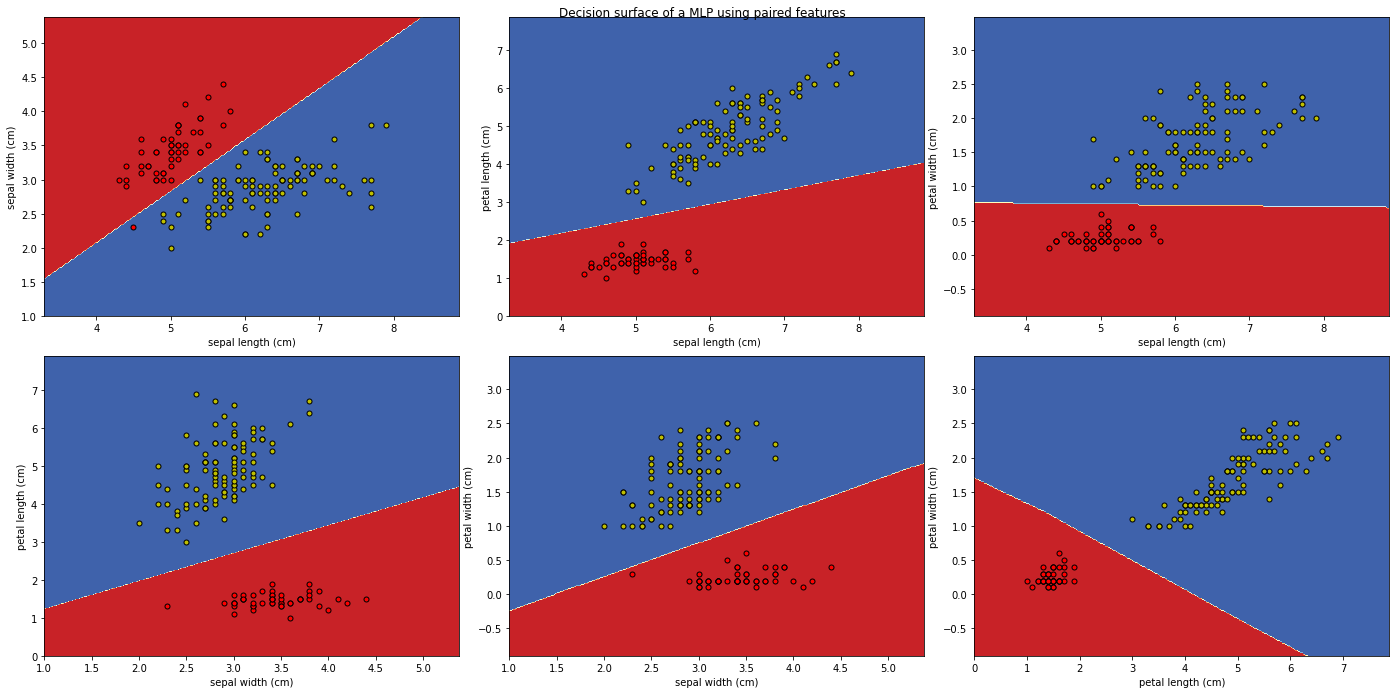

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

def decision_surface_mlp(n_classes):
    plot_colors = "ryb"
    plot_step = 0.02

    # Load data
    iris = load_iris()

    target_names = iris.target_names
    
    if n_classes == 2:
        target_names = ['setosa', 'others']
        
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target
        if n_classes == 2:
            y[y == 2] = 1

        # Train
        clf = MLPClassifier(solver='adam', learning_rate='adaptive', hidden_layer_sizes = (100,), 
                        max_iter=5000, learning_rate_init=5e-04, tol=1e-4, random_state = 1)                 
        clf.fit(X, y)

        # Plot the decision boundary
        plt.figure(1, figsize=(20,10))
        plt.subplot(2, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=25)

    plt.suptitle("Decision surface of a MLP using paired features")
    plt.show()


def decision_surface_mlp_xor():
    plot_step = 0.02

    # Load data
    X = [[0., 0.], [1., 1.], [0., 1.], [1., 0.]]
    y = [0, 0, 1, 1]

    # Train
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1)
    clf.fit(X, y)

    # Plot the decision boundary
    plt.figure(1, figsize=(5,5))
        
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)


    plt.plot(0, 0, 'ko', markersize=20)
    plt.plot(1, 1, 'ko', markersize=20)
    plt.plot(1, 0, 'wx', markersize=20)
    plt.plot(0, 1, 'wx', markersize=20)

    plt.suptitle("Decision surface of a MLP for xor problem")
    plt.show()

    
if __name__ == '__main__':

    # xor
    X = [[0., 0.], [1., 1.], [0., 1.], [1., 0.]]
    y = [0, 0, 1, 1]


    clf = MLPClassifier(solver='adam', learning_rate='adaptive', hidden_layer_sizes = (100,), 
                        max_iter=9000, learning_rate_init=5e-04, tol=1e-4, random_state = 1)
    # random_state (Se fixado, o valor aleatório não muda. Apenas para exemplo!)
    
    clf.fit(X, y)
    print(clf.predict(X))

    decision_surface_mlp_xor()
    decision_surface_mlp(2)

# Classificador Bayesiano

In [115]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def load_iris_3classes():
    data = load_iris()
    return data.data,data.target

def load_iris_binary():
    data = load_iris()
    X = data.data
    y = data.target
    y[y == 2] = 1

    return X,y


def naive_bayes_ex(X, y):
    clf = GaussianNB()
    clf.fit(X, y)

    print('\n---------Naive Bayes----------')
    for i, sigma in enumerate(clf.sigma_):
        print('Variancia da classe {}\n {}'.format(i, sigma))
        
    for i, mean in enumerate(clf.theta_):
        print('Vetor de media da classe {} \n {}'.format(i, mean))

        
    print("[4.9, 3.1, 1.5, 0.1] >> {}".format(clf.predict([[4.9, 3.1, 1.5, 0.1]])))

def qda_ex(X,y):
    clf = QuadraticDiscriminantAnalysis(store_covariance=True)
    clf.fit(X, y)

    print('\n-------------QDA-------------')

    for i,cov in enumerate(clf.covariance_):
        print('Matriz de covariancia da classe {} \n {}'.format(i, cov))

    for i, mean in enumerate(clf.means_):
        print('Vetor de media da classe {} \n {}'.format(i, mean))

    print("[5.1, 3.5, 1.4, 0.2] >> {}".format(clf.predict([[5.1, 3.5, 1.4, 0.2]])))

def lda_ex(X,y):
    clf = LinearDiscriminantAnalysis(store_covariance=True)
    clf.fit(X, y)

    print('\n-------------LDA-------------')
    print('Matriz de covariancia das classes \n{}'.format(clf.covariance_))

    for i, mean in enumerate(clf.means_):
        print('Vetor de media da classe {} \n {}'.format(i, mean))

    print("[5.1, 3.5, 1.4, 0.2] >> {}".format(clf.predict([[5.1, 3.5, 1.4, 0.2]])))
    

if __name__ == '__main__':
    X, y = load_iris_binary()
    # X, y = load_iris_3classes()

    qda_ex(X,y)
    naive_bayes_ex(X, y)
    lda_ex(X, y)


-------------QDA-------------
Matriz de covariancia da classe 0 
 [[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]
Matriz de covariancia da classe 1 
 [[0.43934949 0.12215758 0.45336162 0.1671596 ]
 [0.12215758 0.11072323 0.14279596 0.08002828]
 [0.45336162 0.14279596 0.6815798  0.28873131]
 [0.1671596  0.08002828 0.28873131 0.18042828]]
Vetor de media da classe 0 
 [5.006 3.428 1.462 0.246]
Vetor de media da classe 1 
 [6.262 2.872 4.906 1.676]
[5.1, 3.5, 1.4, 0.2] >> [0]

---------Naive Bayes----------
Variancia da classe 0
 [0.121764 0.140816 0.029556 0.010884]
Variancia da classe 1
 [0.434956 0.109616 0.674764 0.178624]
Vetor de media da classe 0 
 [5.006 3.428 1.462 0.246]
Vetor de media da classe 1 
 [6.262 2.872 4.906 1.676]
[4.9, 3.1, 1.5, 0.1] >> [0]

-------------LDA-------------
Matriz de covariancia das classes 
[[0.33055867 0.11303467

# Support Vector Machines

In [21]:
from sklearn.svm import SVC
import numpy as np

X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])


clf = SVC(kernel='rbf', gamma=2, C=4)
clf.fit(X, y)

print(clf.predict([[-0.8, -1]]))


[1]


# Random Search

In [23]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

def load_iris_3classes():
    data = load_iris()
    return data.data,data.target

def load_iris_binary():
    data = load_iris()
    X = data.data
    y = data.target
    y[y == 2] = 1

    return X,y


X, y = load_iris_3classes()
# X, y = load_iris_binary()

##### Model pre-loadings:
mlp_clf = MLPClassifier(solver='adam', learning_rate='adaptive',max_iter=1300,
                        learning_rate_init=5e-04, tol=1e-4)

svm_rbf_clf = SVC(kernel='rbf')

# Hyperameter tunning by randomized search:
# Classifiers definitions:
classifiers = {'MLP': mlp_clf, 'SVM-RBF': svm_rbf_clf}

print("hidden_layer_sizes: {}".format(list(np.arange(2,500))))
# Define param range for searching:
param_dist_dict = {'MLP': {"hidden_layer_sizes": list(np.arange(2,500))},
                   'SVM-RBF': {'gamma': [2**i for i in range(-5,5)], 'C': [2**i for i in range(-5,5)]}}
# param_dist_dict = {'MLP': {"hidden_layer_sizes": list(np.arange(2, 500))},
#                    'SVM-RBF': {'gamma': [2 ** i for i in range(-15, 3)], 'C': [2 ** i for i in range(-5, 15)]}}


random_search = dict((k,[]) for k in classifiers.keys())
print("random search: {}".format(random_search))

for clf in param_dist_dict.keys():
    random_search[clf] = RandomizedSearchCV(classifiers[clf], param_dist_dict[clf], cv=3, n_iter=5, 
                                            verbose=5, scoring='accuracy')
    random_search[clf].fit(X, y)

hidden_layer_sizes: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. hidden_layer_sizes=427, score=1.000, total=   1.2s
[CV] hidden_layer_sizes=427 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .............. hidden_layer_sizes=427, score=0.960, total=   1.2s
[CV] hidden_layer_sizes=427 ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] .............. hidden_layer_sizes=427, score=0.980, total=   1.2s
[CV] hidden_layer_sizes=91 ...........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s remaining:    0.0s


[CV] ............... hidden_layer_sizes=91, score=1.000, total=   0.9s
[CV] hidden_layer_sizes=91 ...........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s remaining:    0.0s


[CV] ............... hidden_layer_sizes=91, score=0.980, total=   0.9s
[CV] hidden_layer_sizes=91 ...........................................
[CV] ............... hidden_layer_sizes=91, score=0.980, total=   1.1s
[CV] hidden_layer_sizes=220 ..........................................
[CV] .............. hidden_layer_sizes=220, score=1.000, total=   0.9s
[CV] hidden_layer_sizes=220 ..........................................
[CV] .............. hidden_layer_sizes=220, score=0.980, total=   0.8s
[CV] hidden_layer_sizes=220 ..........................................
[CV] .............. hidden_layer_sizes=220, score=0.980, total=   0.9s
[CV] hidden_layer_sizes=198 ..........................................
[CV] .............. hidden_layer_sizes=198, score=1.000, total=   1.1s
[CV] hidden_layer_sizes=198 ..........................................
[CV] .............. hidden_layer_sizes=198, score=0.960, total=   1.0s
[CV] hidden_layer_sizes=198 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   15.5s finished


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] gamma=0.125, C=0.25 .............................................
[CV] ................. gamma=0.125, C=0.25, score=0.960, total=   0.0s
[CV] gamma=0.125, C=0.25 .............................................
[CV] ................. gamma=0.125, C=0.25, score=0.940, total=   0.0s
[CV] gamma=0.125, C=0.25 .............................................
[CV] ................. gamma=0.125, C=0.25, score=0.960, total=   0.0s
[CV] gamma=0.0625, C=1 ...............................................
[CV] ................... gamma=0.0625, C=1, score=0.960, total=   0.0s
[CV] gamma=0.0625, C=1 ...............................................
[CV] ................... gamma=0.0625, C=1, score=0.980, total=   0.0s
[CV] gamma=0.0625, C=1 ...............................................
[CV] ................... gamma=0.0625, C=1, score=0.940, total=   0.0s
[CV] gamma=1, C=2 ....................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


In [24]:
print(random_search)

svm_clf = random_search['SVM-RBF'].best_estimator_
mlp_clf = random_search['MLP'].best_estimator_

print("\n\nBest estimator: \n{} \n{}".format(svm_clf, mlp_clf))

{'MLP': RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='adaptive',
                                           learning_rate_init=0.0005,
                                           max_fun=15000, max_iter=1300,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           rand...
                                           solver='adam', tol=0.0001,
                                           validation_fraction=0.1,
                                 

### Não é correto treinar e testar com os mesmos dados. Devemos fazer um hold-out antes!

In [20]:
from sklearn.metrics import confusion_matrix

pred = svm_clf.predict(X) # X também foi usado no treinamento
confusion_matrix(y, pred)

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  0, 50]])